In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_excel('/content/Percent of Retail and Food (Monthly).xlsx')

In [ ]:
df.dropna()
df.drop(['Jewelry stores', "Men's clothing stores"], axis=1)

,observation_date,All other gen. merchandise stores,Automobile and other motor vehicle dealers,"Automotive parts, acc., and tire stores","Beer, wine and liquor stores",Building mat. and garden equip. and supplies dealers,Building mat. and supplies dealers,Clothing and clothing access. stores,Clothing stores,Department stores,...,Retail sales and food services excl gasoline stations,Retail sales and food services excl motor vehicle and parts,Retail sales and food services excl motor vehicle and parts and gasoline stations,"Retail sales, total","Retail sales, total (excl. motor vehicle and parts dealers)",Shoe stores,"Sporting goods, hobby, musical instrument, and book stores",Warehouse clubs and superstores,Women's clothing stores,USREC
0,1992-01-01,0.016344,0.183839,0.020177,0.010439,0.066090,0.055206,0.059210,0.041183,0.086133,...,0.921978,0.795984,0.717962,0.895365,0.691350,0.009799,0.020628,0.018666,0.016033,0
1,1992-02-01,0.015961,0.185473,0.020461,0.010736,0.066402,0.055318,0.059143,0.041355,0.088129,...,0.923264,0.794066,0.717331,0.896537,0.690603,0.009725,0.021411,0.018933,0.015766,0
2,1992-03-01,0.015227,0.182573,0.021042,0.010707,0.067102,0.055814,0.059058,0.041052,0.088828,...,0.922802,0.796385,0.719187,0.896678,0.693063,0.009596,0.021268,0.019130,0.015630,0
3,1992-04-01,0.015427,0.184331,0.020734,0.010831,0.065194,0.054727,0.059875,0.042220,0.088210,...,0.922834,0.794935,0.717769,0.898749,0.693684,0.009538,0.021462,0.019355,0.016004,0
4,1992-05-01,0.015089,0.186261,0.021194,0.010766,0.065074,0.054610,0.058903,0.041947,0.088363,...,0.922288,0.792545,0.714833,0.899754,0.692299,0.009130,0.021206,0.019395,0.015778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2022-06-01,0.012348,0.170668,0.015134,0.008636,0.061587,0.053784,0.038013,0.025655,0.016558,...,0.899420,0.814198,0.713619,0.874374,0.688572,0.004920,0.013497,0.072867,0.004842,0
366,2022-07-01,0.012425,0.167565,0.015303,0.008640,0.062541,0.054382,0.038010,0.025727,0.016610,...,0.901215,0.817132,0.718347,0.874889,0.692021,0.004949,0.013560,0.072778,0.004879,0
367,2022-08-01,0.012372,0.171598,0.015294,0.008680,0.063169,0.054903,0.038130,0.025957,0.016636,...,0.906739,0.813108,0.719847,0.872675,0.685783,0.005059,0.013614,0.072436,0.004945,0
368,2022-09-01,0.012462,0.170610,0.015575,0.008771,0.062816,0.054406,0.038571,0.026358,0.016858,...,0.910281,0.813815,0.724096,0.871160,0.684974,0.005157,0.013579,0.073439,0.004958,0


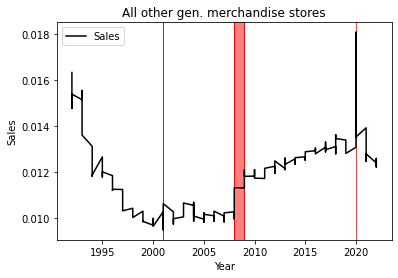

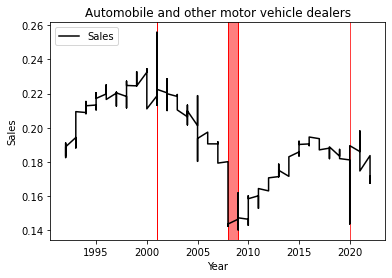

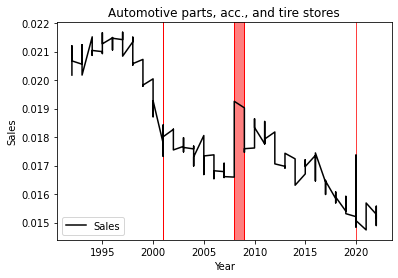

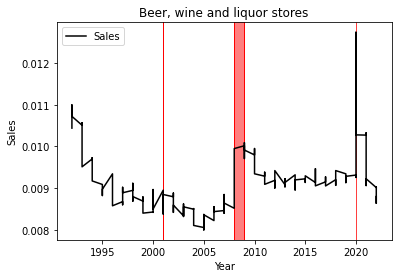

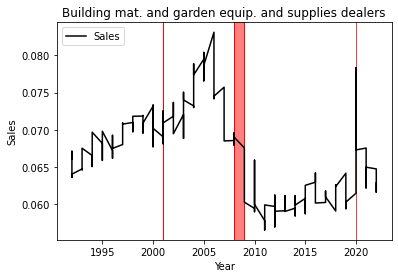

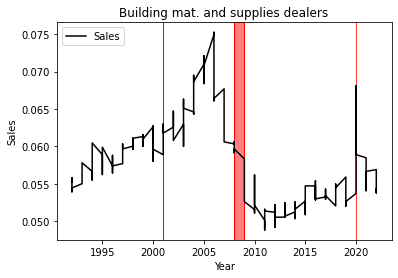

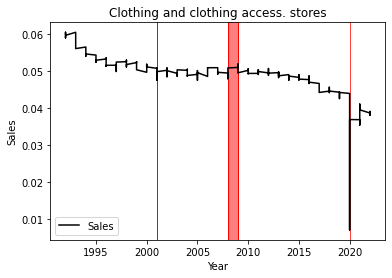

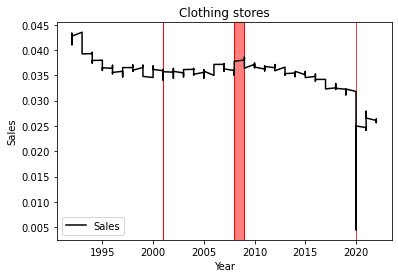

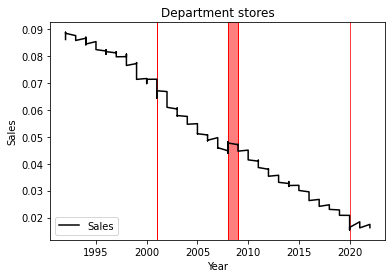

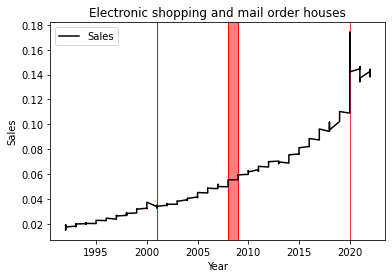

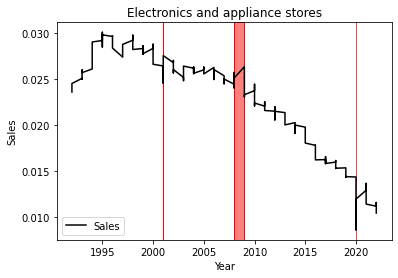

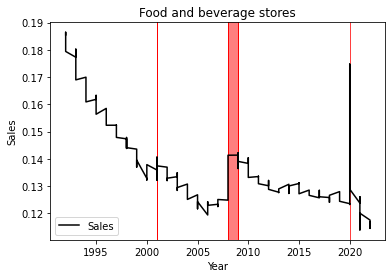

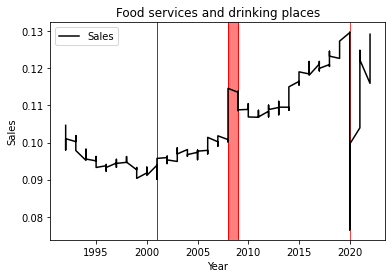

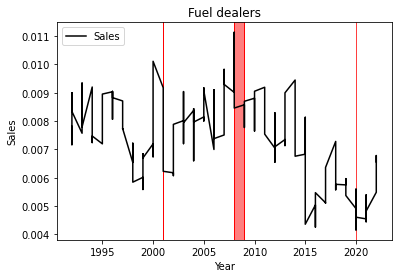

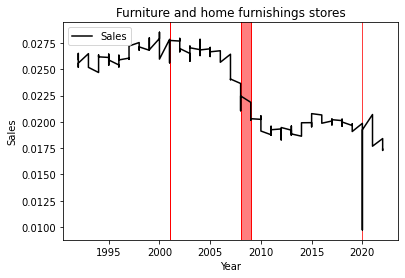

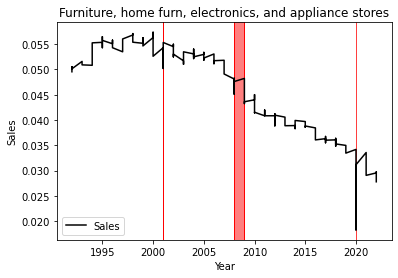

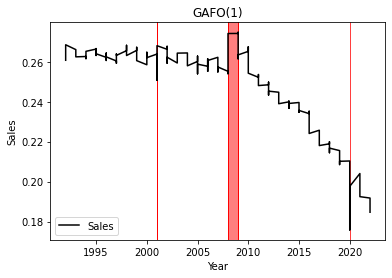

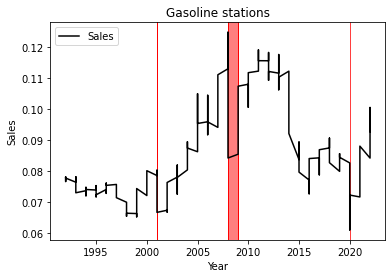

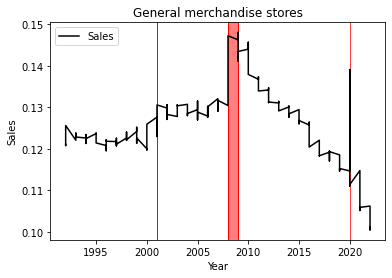

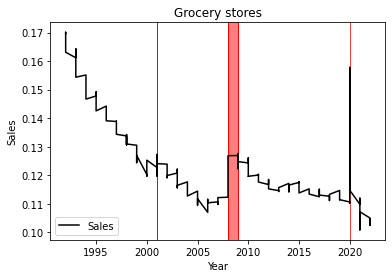

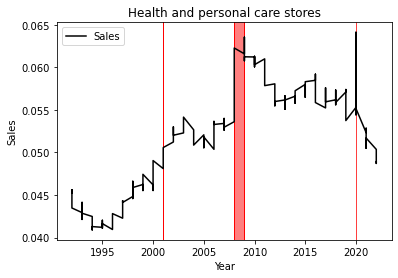

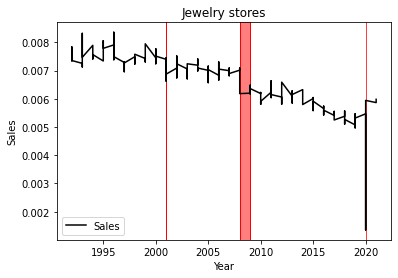

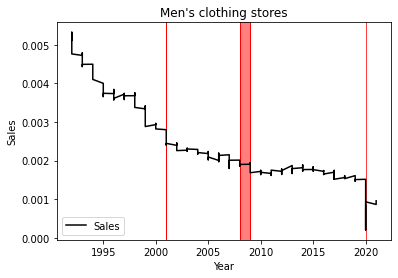

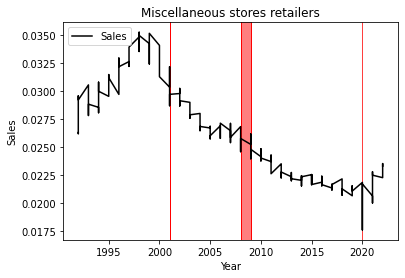

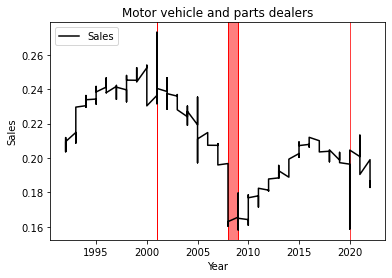

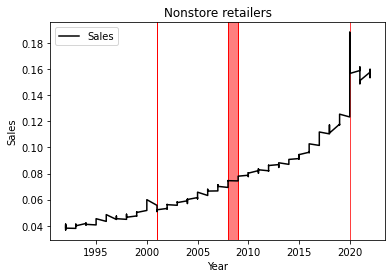

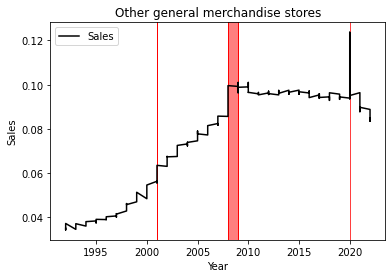

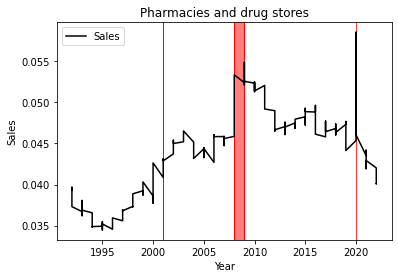

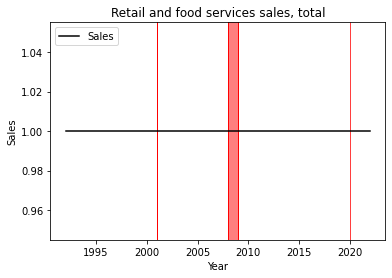

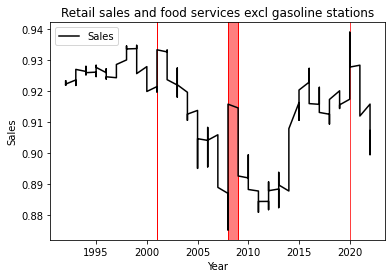

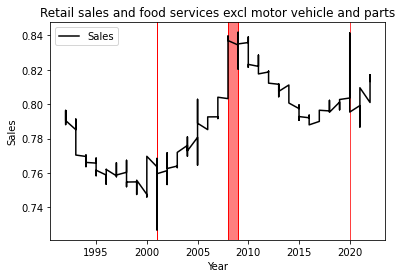

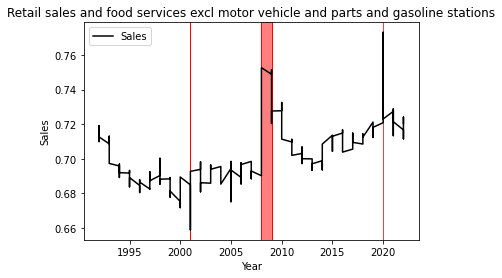

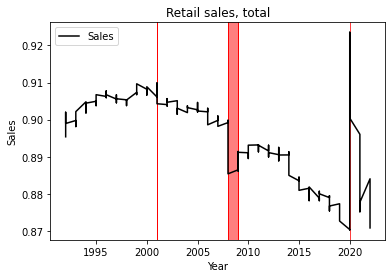

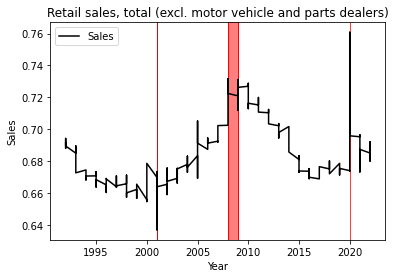

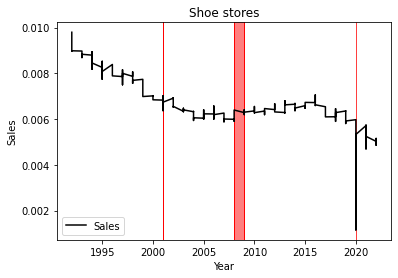

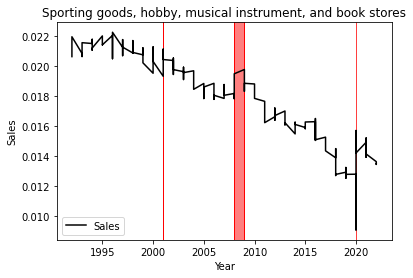

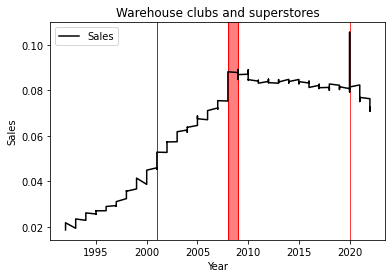

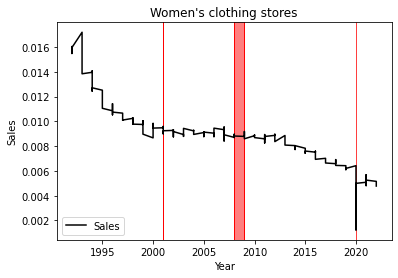

In [ ]:
for column in df.columns[1:39]:
    fig, ax = plt.subplots()
    plt.title(column)
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')

    # plot sales data with black line
    ax.plot(df['observation_date'].dt.year, df[column], color='k', label='Sales')

    # shade recession periods in red
    for _, row in df[df['USREC'] == 1].iterrows():
        ax.axvspan(row['observation_date'].year, (row['observation_date'] + pd.DateOffset(months=1)).year, color='r', alpha=0.5)

    ax.legend()

    # save the figure
    fig.savefig(f"{column}.png")

    plt.show()

In [ ]:
def plot(merged_data):
  for column in merged_data.columns[:-3]:
    fig, ax = plt.subplots()
    plt.title(column)
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')

    # plot sales data with black line
    ax.plot(df['observation_date'].dt.year, df[column], color='k', label='Sales')

    # shade recession periods in red
    for _, row in df[df['recession'] == 'Yes'].iterrows():
        ax.axvspan(row['observation_date'].year, (row['observation_date'] + pd.DateOffset(months=1)).year, color='r', alpha=0.5)

    ax.legend()
    plt.show()

In [ ]:
def recession_periods(df):
  recession_months = df[df['USREC'] == 1]['observation_date']
  recession_months = recession_months.dt.strftime('%b %Y')
  print('Months with recession:')
  for month in recession_months:
    print(month)

In [ ]:
recession_periods(df)

Months with recession:
Apr 2001
May 2001
Jun 2001
Jul 2001
Aug 2001
Sep 2001
Oct 2001
Nov 2001
Jan 2008
Feb 2008
Mar 2008
Apr 2008
May 2008
Jun 2008
Jul 2008
Aug 2008
Sep 2008
Oct 2008
Nov 2008
Dec 2008
Jan 2009
Feb 2009
Mar 2009
Apr 2009
May 2009
Jun 2009
Mar 2020
Apr 2020


In [ ]:
import numpy as np
from scipy import stats

def descriptive_statistics(merged_data):
    for col in merged_data.columns[1:39]:
        category_data = merged_data[col]
        category_mean = category_data.mean()
        category_median = category_data.median()
        category_std = category_data.std()
        category_range = category_data.max() - category_data.min()
        category_n = len(category_data)
        category_se = category_std / np.sqrt(category_n)
        category_ci = stats.t.interval(0.95, df=category_n-1, loc=category_mean, scale=category_se)
        print(f'{col}: Mean={category_mean:.2f}, Median={category_median:.2f}, Std={category_std:.2f}, Range={category_range:.2f}, CI=({category_ci[0]:.2f}, {category_ci[1]:.2f})')

In [ ]:
def t_test(df):
  not_reject = []
  reject = []
  for column in df.columns[1:39]:
    data_recession = df[df['USREC'] == 1][column].astype(float).dropna()
    data_no_recession = df[df['USREC'] == 0][column].astype(float).dropna()
    t_statistic, p_value = ttest_ind(data_recession, data_no_recession, equal_var=False)
    print(f"Industry: {column}")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")
    if p_value <= 0.05:
        #print("Mean spending proportion is not the same in recession and non-recession periods")
        not_reject.append(column)
    else:
        #print("Mean spending proportion is the same in recession and non-recession periods")
        reject.append(column)

  print(not_reject)
  print(reject)
  print("\n")

In [ ]:
descriptive_statistics(df)

All other gen. merchandise stores: Mean=0.01, Median=0.01, Std=0.00, Range=0.01, CI=(0.01, 0.01)
Automobile and other motor vehicle dealers: Mean=0.19, Median=0.19, Std=0.02, Range=0.12, CI=(0.19, 0.20)
Automotive parts, acc., and tire stores: Mean=0.02, Median=0.02, Std=0.00, Range=0.01, CI=(0.02, 0.02)
Beer, wine and liquor stores: Mean=0.01, Median=0.01, Std=0.00, Range=0.00, CI=(0.01, 0.01)
Building mat. and garden equip. and supplies dealers: Mean=0.07, Median=0.07, Std=0.01, Range=0.03, CI=(0.07, 0.07)
Building mat. and supplies dealers: Mean=0.06, Median=0.06, Std=0.01, Range=0.03, CI=(0.06, 0.06)
Clothing and clothing access. stores: Mean=0.05, Median=0.05, Std=0.01, Range=0.05, CI=(0.05, 0.05)
Clothing stores: Mean=0.04, Median=0.04, Std=0.00, Range=0.04, CI=(0.03, 0.04)
Department stores: Mean=0.05, Median=0.05, Std=0.02, Range=0.07, CI=(0.05, 0.05)
Electronic shopping and mail order houses: Mean=0.06, Median=0.05, Std=0.04, Range=0.16, CI=(0.06, 0.06)
Electronics and applian

/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.9/dist-packages/scipy/stats/_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
t_test(df)

Industry: All other gen. merchandise stores
t-statistic: -2.054841442863633
p-value: 0.04872145179722986
Industry: Automobile and other motor vehicle dealers
t-statistic: -3.0539563101790668
p-value: 0.004846898061347067
Industry: Automotive parts, acc., and tire stores
t-statistic: -1.4904504751060992
p-value: 0.1429003684627533
Industry: Beer, wine and liquor stores
t-statistic: 1.3864549714238783
p-value: 0.1762957167271002
Industry: Building mat. and garden equip. and supplies dealers
t-statistic: 4.668038624193161
p-value: 1.778269726844609e-05
Industry: Building mat. and supplies dealers
t-statistic: 4.687265173055233
p-value: 1.5113172941743919e-05
Industry: Clothing and clothing access. stores
t-statistic: -1.0316603182162312
p-value: 0.3109446341477061
Industry: Clothing stores
t-statistic: -0.5864655302257131
p-value: 0.5622085061167224
Industry: Department stores
t-statistic: -0.578740902037911
p-value: 0.5658514781639605
Industry: Electronic shopping and mail order houses
t

<ipython-input-45-d537fbe09f48>:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = ttest_ind(data_recession, data_no_recession, equal_var=False)


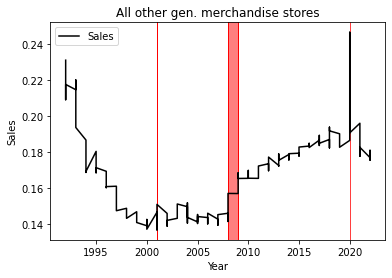

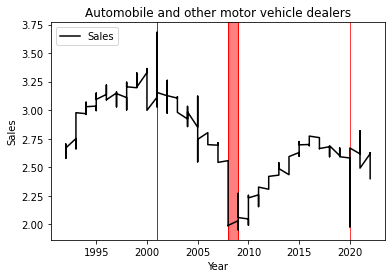

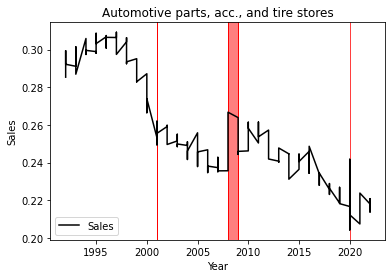

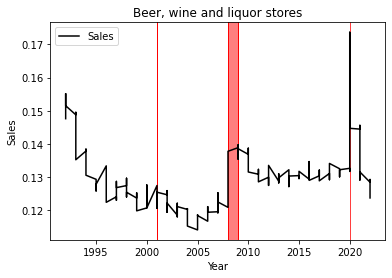

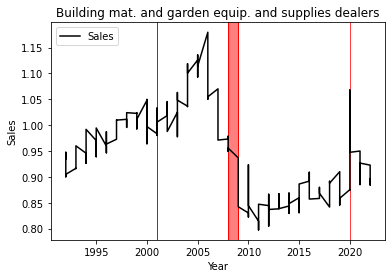

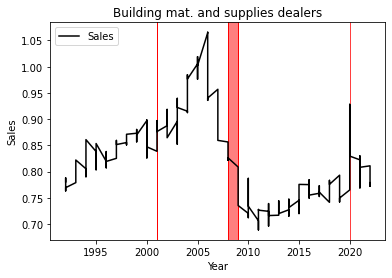

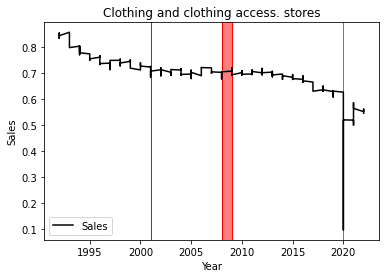

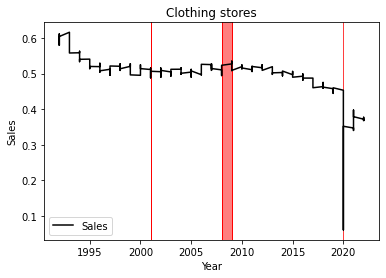

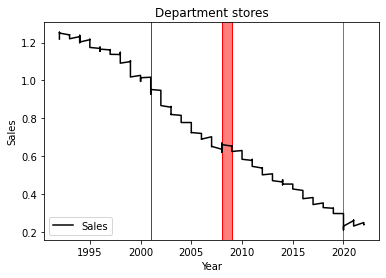

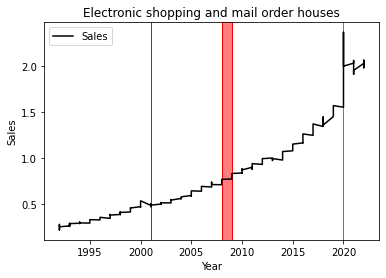

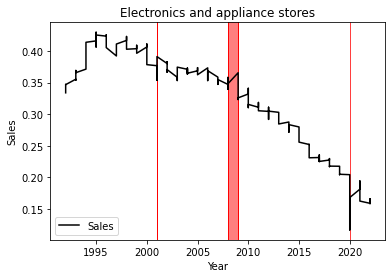

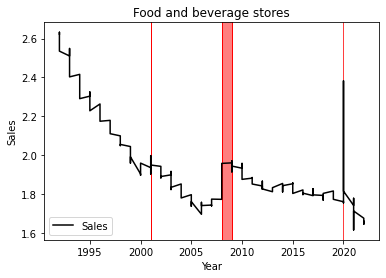

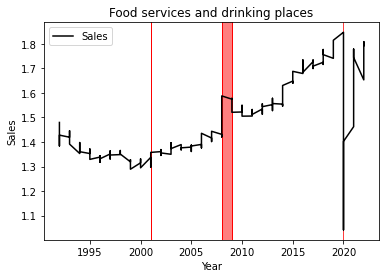

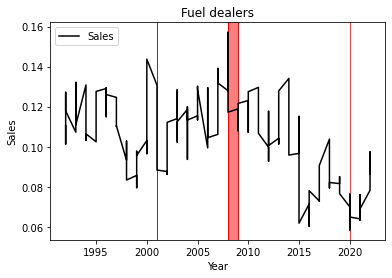

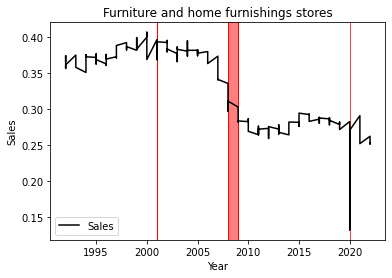

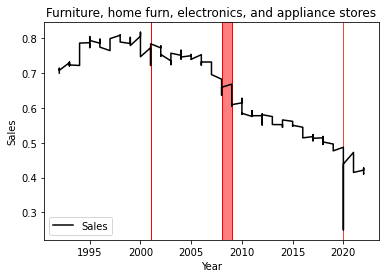

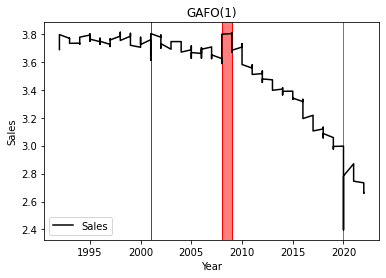

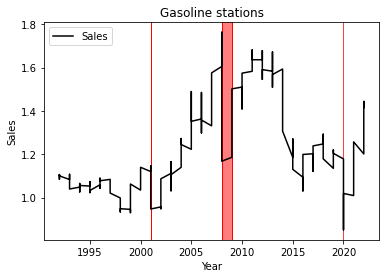

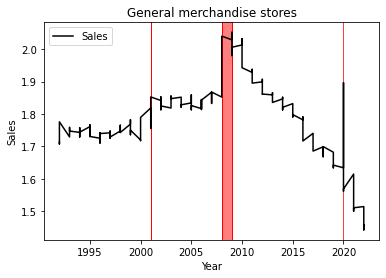

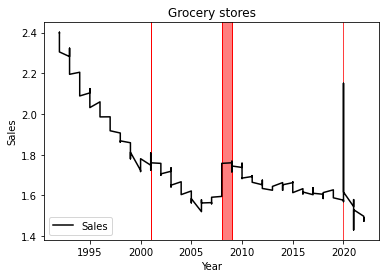

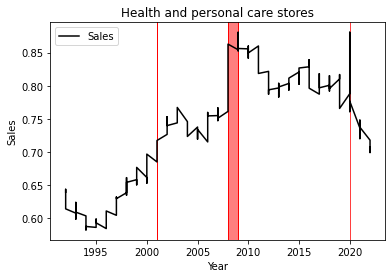

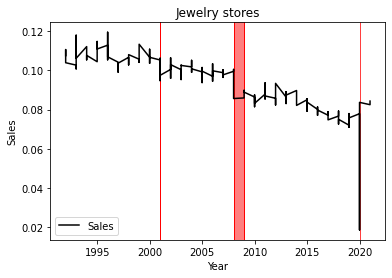

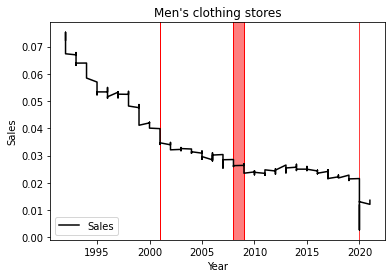

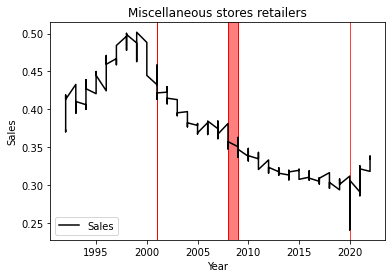

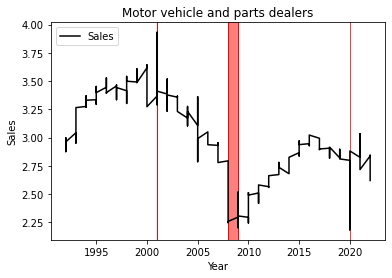

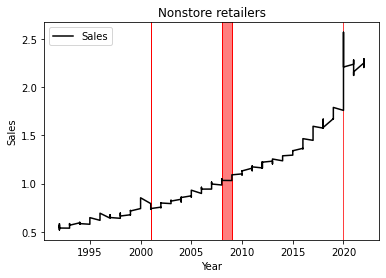

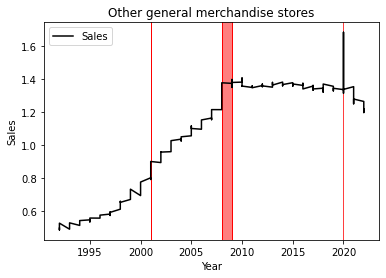

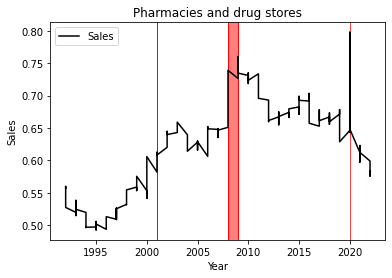

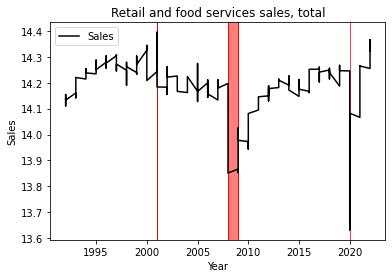

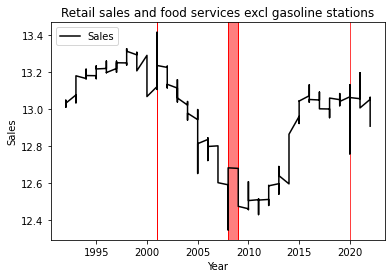

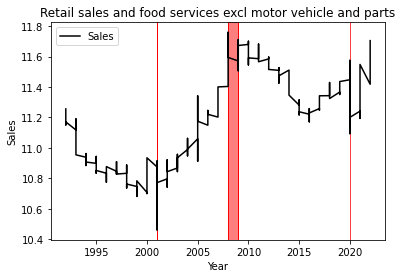

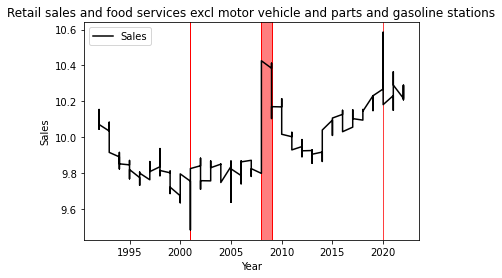

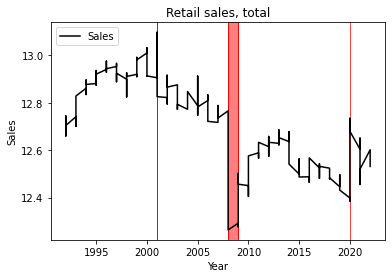

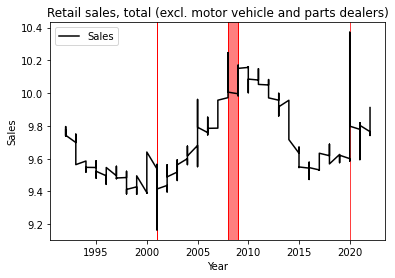

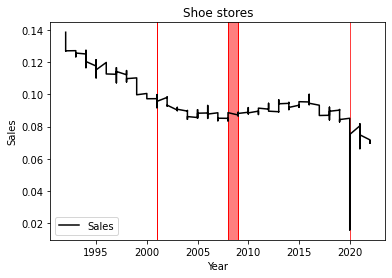

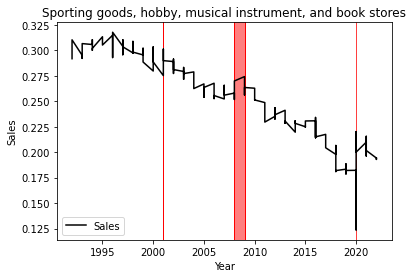

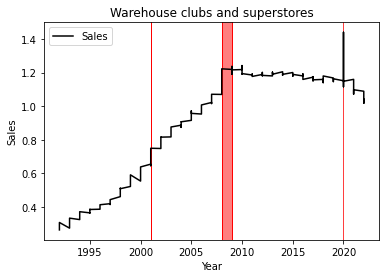

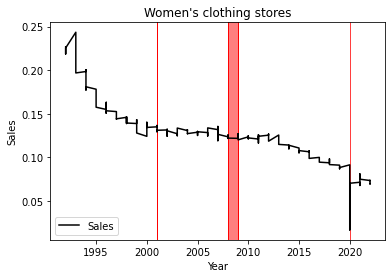

In [ ]:
plot(df)

In [ ]:
recession_periods(df)

Months with recession:
Apr 2001
May 2001
Jun 2001
Jul 2001
Aug 2001
Sep 2001
Oct 2001
Nov 2001
Jan 2008
Feb 2008
Mar 2008
Apr 2008
May 2008
Jun 2008
Jul 2008
Aug 2008
Sep 2008
Oct 2008
Nov 2008
Dec 2008
Jan 2009
Feb 2009
Mar 2009
Apr 2009
May 2009
Jun 2009
Mar 2020
Apr 2020


In [ ]:
descriptive_statistics(df)

All other gen. merchandise stores: Mean=0.17, Median=0.17, Std=0.02, Range=0.11
Automobile and other motor vehicle dealers: Mean=2.75, Median=2.71, Std=0.34, Range=1.73
Automotive parts, acc., and tire stores: Mean=0.26, Median=0.25, Std=0.03, Range=0.10
Beer, wine and liquor stores: Mean=0.13, Median=0.13, Std=0.01, Range=0.06
Building mat. and garden equip. and supplies dealers: Mean=0.95, Median=0.95, Std=0.08, Range=0.38
Building mat. and supplies dealers: Mean=0.82, Median=0.81, Std=0.08, Range=0.38
Clothing and clothing access. stores: Mean=0.70, Median=0.70, Std=0.08, Range=0.76
Clothing stores: Mean=0.50, Median=0.51, Std=0.06, Range=0.56
Department stores: Mean=0.73, Median=0.68, Std=0.33, Range=1.04
Electronic shopping and mail order houses: Mean=0.82, Median=0.70, Std=0.50, Range=2.16
Electronics and appliance stores: Mean=0.32, Median=0.35, Std=0.07, Range=0.31
Food and beverage stores: Mean=1.94, Median=1.86, Std=0.23, Range=1.02
Food services and drinking places: Mean=1.4

In [ ]:
t_test(df)

Industry: All other gen. merchandise stores
t-statistic: -2.911544356441927
p-value: 0.003817388057459159
Mean spending proportion is not the same in recession and non-recession periods


Industry: Automobile and other motor vehicle dealers
t-statistic: -4.877488338681816
p-value: 1.6071344124751723e-06
Mean spending proportion is not the same in recession and non-recession periods


Industry: Automotive parts, acc., and tire stores
t-statistic: -1.3583512908654465
p-value: 0.17519119420771598
Mean spending proportion is the same in recession and non-recession periods


Industry: Beer, wine and liquor stores
t-statistic: 1.3599227526615305
p-value: 0.17469375970638976
Mean spending proportion is the same in recession and non-recession periods


Industry: Building mat. and garden equip. and supplies dealers
t-statistic: 1.6777664614190797
p-value: 0.09424871015165381
Mean spending proportion is the same in recession and non-recession periods


Industry: Building mat. and supplies dealer